In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.read_csv('water_potability.csv')

In [51]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [53]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [54]:
my = list(df.columns)


In [55]:
df.boxplot(my)

<Axes: >

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

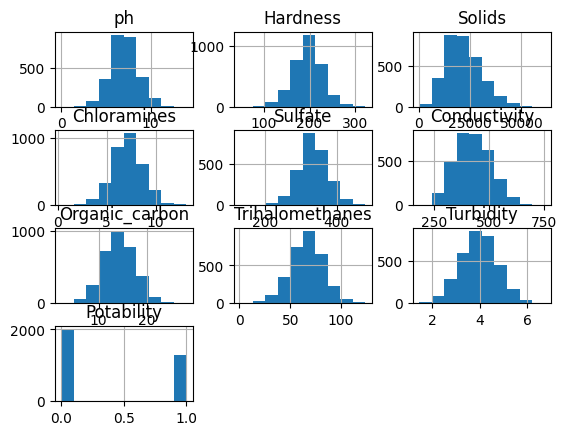

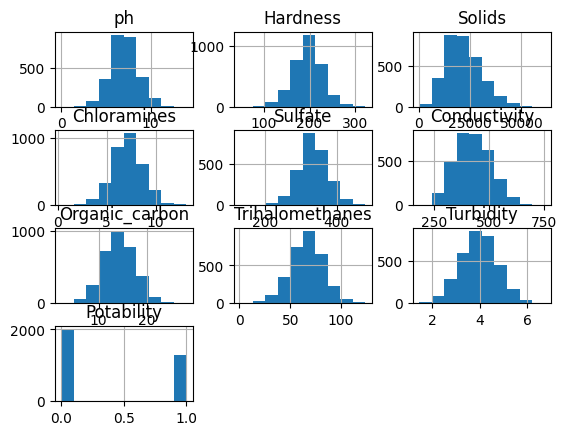

In [56]:
df.hist(my)

In [57]:
df['ph'].fillna(df['ph'].median(),inplace = True)

In [58]:
df['Sulfate'].fillna(df['Sulfate'].median(),inplace = True)

In [59]:
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),inplace = True)

In [60]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [61]:
len(df[(df['ph']< 6.52) & (df['ph']> 6.83)])

0

In [62]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [63]:
len(df[(df['Solids']<500 ) & (df['Solids']> 1000)])

0

In [64]:
len(df[(df['Chloramines']<0 ) & (df['Chloramines']> 4)])

0

In [65]:
len(df[(df['Sulfate']<3 ) & (df['Sulfate']> 30)])

0

In [66]:
len(df[(df['Conductivity']<0 ) & (df['Conductivity']> 400)])

0

In [67]:
len(df[(df['Trihalomethanes']<0 ) & (df['Trihalomethanes']> 80)])

0

In [68]:
y = df['Potability']
x = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

In [69]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logmodel = LogisticRegression()

In [74]:
logmodel.fit(x_train,y_train)

c:\Users\joy\anaconda3\envs\tcm_venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
predictions = logmodel.predict(x_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983



c:\Users\joy\anaconda3\envs\tcm_venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joy\anaconda3\envs\tcm_venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joy\anaconda3\envs\tcm_venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
from sklearn.metrics import confusion_matrix 

In [79]:
confusion_matrix(y_test,predictions)

array([[617,   0],
       [366,   0]], dtype=int64)

In [80]:
##training a decision tree model

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtree = DecisionTreeClassifier()

In [83]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [84]:
pred = dtree.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix ,classification_report

In [86]:
print(confusion_matrix(y_test,pred) )

[[372 245]
 [183 183]]


In [87]:
print(classification_report(y_test,pred) )

              precision    recall  f1-score   support

           0       0.67      0.60      0.63       617
           1       0.43      0.50      0.46       366

    accuracy                           0.56       983
   macro avg       0.55      0.55      0.55       983
weighted avg       0.58      0.56      0.57       983



In [88]:
##random forest model

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
 rfc = RandomForestClassifier(n_estimators = 500) 

In [91]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [92]:
predo = rfc.predict(x_test)

In [93]:
from sklearn.metrics import confusion_matrix ,classification_report

In [94]:
print(confusion_matrix(y_test,predo) )

[[547  70]
 [238 128]]


In [95]:
print(classification_report(y_test,predo))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       617
           1       0.65      0.35      0.45       366

    accuracy                           0.69       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.69      0.66       983



In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

columns_to_standardize = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

In [98]:
standardized_features = scaler.fit_transform(x)

In [99]:
df1 = pd.DataFrame(standardized_features,columns = x.columns)

In [100]:
df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.306149,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.638480,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.001509,-1.167365
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152874,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.181599,0.138786


In [101]:
df2 = pd.concat([df1,y],axis = 1)

In [102]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [103]:
df2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.306149,-1.286298,0
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.638480,0.684218,0
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.001509,-1.167365,0
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152874,0.848412,0
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.181599,0.138786,0


In [104]:
y = df2['Potability']
x = df2[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
logmodel = LogisticRegression()

In [109]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [110]:
predictions1 = logmodel.predict(x_test)

In [111]:
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       1.00      0.00      0.01       366

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983



In [113]:
print(confusion_matrix(y_test,predictions))

[[617   0]
 [366   0]]


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [116]:
from sklearn.svm import SVC

In [117]:
model = SVC()

In [118]:
model.fit(x_train,y_train)

SVC()

In [119]:
predicto = model.predict(x_test)

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
print(classification_report(y_test,predicto))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79       617
           1       0.72      0.30      0.42       366

    accuracy                           0.70       983
   macro avg       0.71      0.62      0.61       983
weighted avg       0.70      0.70      0.66       983



In [2]:
import joblib

In [4]:
joblib.dump('model', 'second water project.pkl')


['second water project.pkl']